#  Conﬁrming some numbers (analytical) 

During the lecture we came across the question what $Cov[x,x^2]$ might be. After practicing calculating covariances analytically, it should not be a big deal for you to conﬁrm the following: 

$Cov[x,x^2]=<x^3>-<x><x^2>$, $Cor[x,x^2]=\frac{Cov[x,x^2]}{\sigma_x\sigma_y}$

* a: if x ∼ N(0,1): $Cov[x,x^2]=0$, $Cor[x,x^2]=0$

  For normal distribution with $\mu=<x>=0, \sigma^2=1$: $Cov[x,x^2]=<x^3>=0$ since x is symmetric distributed around 0.
  
  Thus $Cor[x,x^2]=0$


* b: if x ∼ U(0,1): $Cov[x,x^2]=\frac{1}{12}$, $Cor[x,x^2]=\frac{1}{4}\sqrt{15}$

  x ∼ U(0,1) $\Rightarrow p(x)=\chi_{[0,1]}(x)\Rightarrow \mu=\frac{1}{2}, \sigma^2=\frac{1}{12}$, its CDF is $F_X(x)=\frac{x-a}{b-a}$ for $x\in[a,b)$ and $F_X(x)=1$ for $x\geq b$.
  
  Assume $Y=X^2$: $F_Y(y)=P(Y\leq y)=P(X^2\leq y)=P(-\sqrt y\leq X\leq \sqrt y)=P(0 \leq X\leq \sqrt y)=$ $\Rightarrow<x^2>=\int_{0}^{1}$
  
  $Cov[x,x^2]=\frac{1}{4}-\frac{1}{2}\cdot \frac{1}{3}$
  
  
* c: in case a) $x$ and $x^2$ are uncorrelated. Are they also independent? 

  They are not independent. Given x one can predict $x^2$ with certainty. Given $x^2$ one can predict x with 50% certainty

# The Shadoks try to launch a rocket (mostly analytical)

The Shadoks (from an old French cartoon) once planned to visit planet Earth. To this end, they build rockets. Unfortunately, the Shadoks are poor engineers, and moreover lack any ability to learn from mishaps. It was estimated that a successful launch of a Shadok rocket would be a very unlikely event with a probability of one in a million only. The Shadoks, not knowing any statistics, concluded it would be best to work hard to perform ﬁrst the implied 999999 unsuccessful launches, and then being sure to be successful at the one-millionth launch, going perfectly safe to Earth.

* a. What is the probability that the one-millionth launch is actually successful?

  The probability is $1/10^6$, it has nothing to do with how many times the experiment has been carried out.
  

* b: What is the probability that among the one million launches the Shadoks perform is at least one (accidentally) successful? Hints: Think about the complement of the asked probability. A useful formula is perhaps $\exp(x) = \lim_{n→∞}(1 + x/n)^n$. One may also see the launch problem in the light of Poisson statistics.

  Its probability is the complement of the probability that none is successful, the probability of which is then the product of probability of unsuccess at one time, because the launches are mutually independent: $P = 1-(1-\frac{1}{10^6})^{10^6}$, thus according to the formula in the hint: $P=1-\exp(-1)\approx0.63$ 
  
  Poisson: $P(k=0 | \lambda=1)$


# Random samples with a Monte Carlo Markov chain

Let’s assume we want to generate random numbers from the distribution $p(x) ∝ \exp(−[x + 2\cos^2(x)]^2)$. This simple case could also be done with the rejection method, but here we want to adopt a diﬀerent approach, namely the use of a stochastic process constructed with the Metropolis algorithm.

* a: Start with some random guess $x_0$ for which $p(x)$ is not zero. 
* b: Make a proposal for $x'_i$ in your chain by adding a random number drawn uniformly from the interval $[−1,1]$ to $x_{i−1}$. 
* c: Accept the proposal with probability $r = \min\{1, \frac{p(x'_i)}{p(x_{i−1})}\}$. i.e. in the case of acceptance make it the entry $x_i$ in your Monte Carlo chain. Otherwise, adopt the unmodiﬁed $x_{i−1}$ as your element $x_i$. Then proceed with the next element $i + 1$. 
* d: Produce a chain with $N = 10^6$ elements, and make a histogram with bin size $∆x = 0.02$ of the entries in order to verify that they correctly sample the overplotted shape of $p(x)$. How many diﬀerent points are in your chain?


Number of different points:  506488 


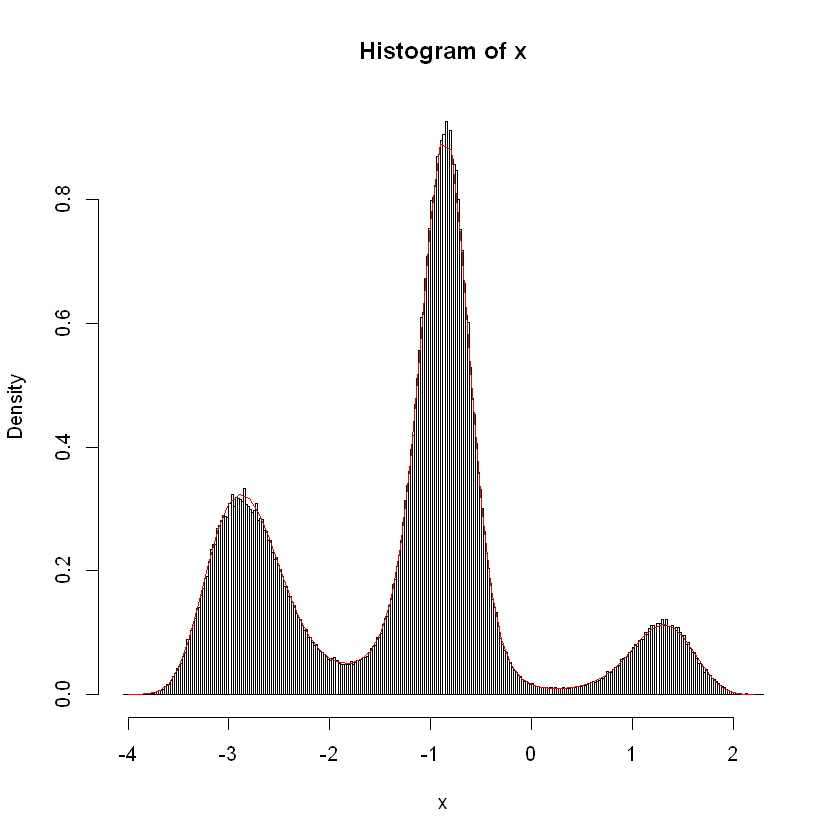

In [21]:
# PDF
p <- function(x){
    return(exp(-(x+2*cos(x)^2)^2))
}
N <- 10^6
npoints <- 1
x <- vector(length=N)
x_im1 <- -3
x[1] <- x_im1
for (i in 2:N){
    x_im1 <- x[i-1]
    xi_p <- x_im1 + runif(1, -1, 1)
    r <- min(1, p(xi_p)/p(x_im1))
    c <- runif(1)
    if (r > c){
        x[i] <- xi_p
        if (xi_p != x_im1) 
            npoints <- npoints + 1
    }
    else{
        x[i] <- x_im1
    }
}
cat("Number of different points: ", npoints, "\n")
# alternatively length(unique(...))
hist(x,breaks=6/0.02, probability=TRUE)
# for comparison the normalization of PDF should be considered for underlying PDF
# the integral of the PDF equals to approximately 1.10401 (using WolframAlpha)
t <- seq(-4, 2.2, 0.1)
lines(t, p(t)/1.10401, type='l', col="red")